<a href="https://colab.research.google.com/github/JLALLANOSM/Sis420_LlanosMendoza/blob/main/LAB7/tarea1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio de programación Regresión Lineal

In [83]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [84]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1 Regresión lineal con una variable

El archivo `Datasets/ex1data1.txt` contiene el dataset para el problema de regresion lineal. La primera columna es la problacion de una ciudad (en 10,000s) y la segunda columna es el beneficio que genera un camion de comida en esa ciudad (en $10,000s). Un valor negativo indica una perdida. 

In [85]:
# Leer datos separados por una coma
data = np.loadtxt(os.path.join('/content/drive/MyDrive/datasets/AlquilerPrecio.txt'), delimiter=',')
X, y = data[:200, 4], data[:200, 2]

m = y.size  # m = numero de ejemplos de entrenamiento

In [86]:
print(X)
print(y)
print(m)

[ 34.  52. 140.  32.  33.  30.  33.  50.  50.  47.  42.  56.  55.  31.
  39.  32.  36.  45.  36.  40.  46.  59.  32.  47.  47.  45.  46.  36.
  35.  34.  31.  41.  42.  34.  39.  51.  26.  58.  39.  42.  42.  47.
  37.  47.  32.  30.  48.  45.  22.  42.  42.  34.  45.  32.  34.  31.
  35.  30.  34.  33.  32.  31.  24.  35.  35.  33.  44.  43.  54.  26.
  43.  43.  34.  54.  54.  43.  47.  31.  43.  51.  50.  42.  35.  29.
  31.  30.  32.  37.  35.  53.  29.  47.  36.  27.  59.  34.  47.  30.
  43.  20.  40.  16.  35.  30.  47.  46.  53.  42.  29.  47.  41.  68.
  44.  29.  30.  68.  41.  45.  60.  90.  40.  53.  39.  24.  34.  32.
  20. 176.  45.  37.  40.  48.  48.  38.  31.  42.  39.  29.  26.  47.
  46.  59.  24.  29.  41.  45.  34.  40.  47.  32. 126. 184.  44.  30.
  39.  32.  40.  48.  49.  49.  33.  41.  40.  29.  67.  41.  30.  54.
 219.  44.  32.  22.  42. 196.  26.  60.  32.  35.  43.  18.  44.  46.
  59.  29.  32.  50.  29.  31.  56.  28.  40.  49.  25.  55.  44.  90.
  39. 

### 1.1 Trazar los datos

In [87]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva. 
    
    fig = pyplot.figure()  # abre una nueva figura
    
    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Beneficio en $10,000')
    pyplot.xlabel('Poblacion de una ciudad en 10,000s')


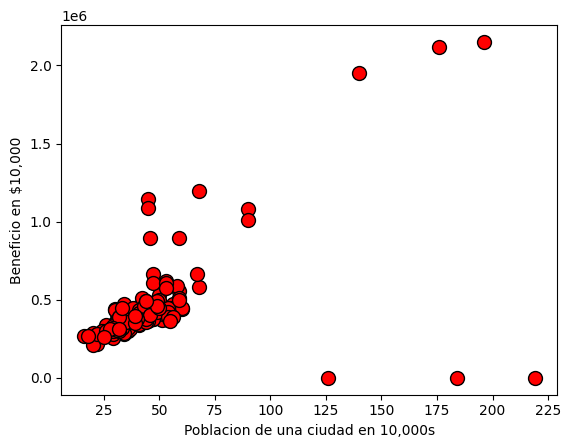

In [88]:
plotData(X, y)

In [89]:
?pyplot.plot

# <a id="section2"></a>
### 1.2 Descenso por el gradiente

#### 1.2.1 Ecuaciones de actualización

El objetivo de la regresion lineal es minimizar la funcion de costo

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

donde la hipotesis $h_\theta(x)$ esta dada por el modelo lineal
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Los parametros del modelo son los valores $\theta_j$. Estos son los valores que se ajustaran al costo minimo $J(\theta)$. Un camino para lograr esto es usar el algoritmo por lotes del descenso por el gradiente. En el descenso por el gradiente por lotes, cada iteracion ejecuta una actualizacion 
$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{actualizacion simultanea } \theta_j \text{ for all } j$$

Con cada paso del descenso por el gradiente, los parametros $\theta_j$ son mas cercanos a los valores optimos que permitiran lograr el costo mas bajo J($\theta$).

#### 1.2.2 Implementación

In [90]:
# Agrega una columna de unos a X. La funcion stack de numpy une matrices a lo largo de un eje dado.
# El primer eje (eje = 0) se refiere a filas (ejemplos de entrenamiento)
# y el segundo eje (eje = 1) se refiere a columnas (características).

X = np.stack([np.ones(m), X], axis=1)

In [91]:
print(X)

[[  1.  34.]
 [  1.  52.]
 [  1. 140.]
 [  1.  32.]
 [  1.  33.]
 [  1.  30.]
 [  1.  33.]
 [  1.  50.]
 [  1.  50.]
 [  1.  47.]
 [  1.  42.]
 [  1.  56.]
 [  1.  55.]
 [  1.  31.]
 [  1.  39.]
 [  1.  32.]
 [  1.  36.]
 [  1.  45.]
 [  1.  36.]
 [  1.  40.]
 [  1.  46.]
 [  1.  59.]
 [  1.  32.]
 [  1.  47.]
 [  1.  47.]
 [  1.  45.]
 [  1.  46.]
 [  1.  36.]
 [  1.  35.]
 [  1.  34.]
 [  1.  31.]
 [  1.  41.]
 [  1.  42.]
 [  1.  34.]
 [  1.  39.]
 [  1.  51.]
 [  1.  26.]
 [  1.  58.]
 [  1.  39.]
 [  1.  42.]
 [  1.  42.]
 [  1.  47.]
 [  1.  37.]
 [  1.  47.]
 [  1.  32.]
 [  1.  30.]
 [  1.  48.]
 [  1.  45.]
 [  1.  22.]
 [  1.  42.]
 [  1.  42.]
 [  1.  34.]
 [  1.  45.]
 [  1.  32.]
 [  1.  34.]
 [  1.  31.]
 [  1.  35.]
 [  1.  30.]
 [  1.  34.]
 [  1.  33.]
 [  1.  32.]
 [  1.  31.]
 [  1.  24.]
 [  1.  35.]
 [  1.  35.]
 [  1.  33.]
 [  1.  44.]
 [  1.  43.]
 [  1.  54.]
 [  1.  26.]
 [  1.  43.]
 [  1.  43.]
 [  1.  34.]
 [  1.  54.]
 [  1.  54.]
 [  1.  43.]
 [  1.  47.]

<a id="section2"></a>
#### 1.2.3 Cálculo del costo $J(\theta)$

In [92]:
def computeCost(X, y, theta):
    # inicializa algunos valores importantes
    m = y.size  # numero de ejemplos de entrenamiento
   
    J = 0
    h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

Ejemplo de funcionamiento de la funcion computeCoste con dos valores diferentes de $\theta$. 

In [93]:
J = computeCost(X, y, theta=np.array([0.0, 0.0]))
print('Con theta = [0, 0] \n Costo calculado = %.2f' % J)
print('Valor de costo esperado (aproximadamente) 32.07\n')

# pruebas adicionales de la función de costes
J = computeCost(X, y, theta=np.array([-1, 2]))
print('Con theta = [-1, 2]\n Costo calculado = %.2f' % J)
print('Valor de costo esperado (aproximadamente)  54.24')

Con theta = [0, 0] 
 Costo calculado = 123647150177.44
Valor de costo esperado (aproximadamente) 32.07

Con theta = [-1, 2]
 Costo calculado = 123602982730.23
Valor de costo esperado (aproximadamente)  54.24


<a id="section3"></a>
#### 1.2.4 Descenso por el gradiente

El costo $J(\theta)$ esta parametrizado por el vector $\theta$, no $X$ y $y$. Donde hay que minimizar el valor de $J(\theta)$ cambiando los valores del vector $\theta$. Una buena manera de verificar si el descenso por el gradiente esta trabajando correctamente es ver los valores de $J(\theta)$ y verificar si estos decresen en cada paso. 

<div class="alert alert-box alert-warning">
**Vectores y matrices en `numpy`** - Importantes notas para implementación
Un vector en `numpy` es un array de una diemension, por ejemplo `np.array([1, 2, 3])` es un vector. Una matriz en `numpy` is un arreglo de dos dimensiones, por ejemplo  `np.array([[1, 2, 3], [4, 5, 6]])`. Sin embargo, lo siguiente todavía se considera una matriz `np.array ([[1, 2, 3]])` ya que tiene dos dimensiones, incluso si tiene una forma de 1x3 (que parece un vector).

In [94]:
def gradientDescent(X, y, theta, alpha, num_iters):
        # Inicializa algunos valores importantes
    m = y.shape[0]  # numero de ejemplos de entrenamiento
    
    # hace una copia de theta, para evitar cambiar la matriz original, 
    # ya que las matrices numpy se pasan por referencia a las funciones

    theta = theta.copy()
    
    J_history = [] # Lista que se utiliza para almacenar el costo en cada iteración
    
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        # save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))
    
    return theta, J_history

Se inicializan los parametros $\theta$ con 0 y la taza de aprendizaje $\alpha$ con 0.01.

In [95]:
# inicializa los parametros de ajuste
theta = np.zeros(2)

# configuraciones para el descenso por el gradiente
iterations = 2000
alpha = 0.0001

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print(J_history[-1])
print('Theta encontrada por descenso gradiente: {:.4f}, {:.4f}'.format(*theta))
print('Valores theta esperados (aproximadamente): [-3.6303, 1.1664]')

27829400968.074318
Theta encontrada por descenso gradiente: 9886.8208, 8383.6977
Valores theta esperados (aproximadamente): [-3.6303, 1.1664]


Se utilizan los parametros finales para grafical la linea.

array([ 294932.54433817,  445839.1038325 , 1183604.50580475,
        278165.1488388 ,  286548.84658849,  261397.75333943,
        286548.84658849,  429071.70833313,  429071.70833313,
        403920.61508407,  362002.12633565,  479373.89483124,
        470990.19708155,  269781.45108912,  336851.03308659,
        278165.1488388 ,  311699.93983754,  387153.2195847 ,
        311699.93983754,  345234.73083628,  395536.91733439,
        504524.98808029,  278165.1488388 ,  403920.61508407,
        403920.61508407,  387153.2195847 ,  395536.91733439,
        311699.93983754,  303316.24208786,  294932.54433817,
        269781.45108912,  353618.42858596,  362002.12633565,
        294932.54433817,  336851.03308659,  437455.40608281,
        227862.96234069,  496141.2903306 ,  336851.03308659,
        362002.12633565,  362002.12633565,  403920.61508407,
        320083.63758723,  403920.61508407,  278165.1488388 ,
        261397.75333943,  412304.31283376,  387153.2195847 ,
        194328.17134195,

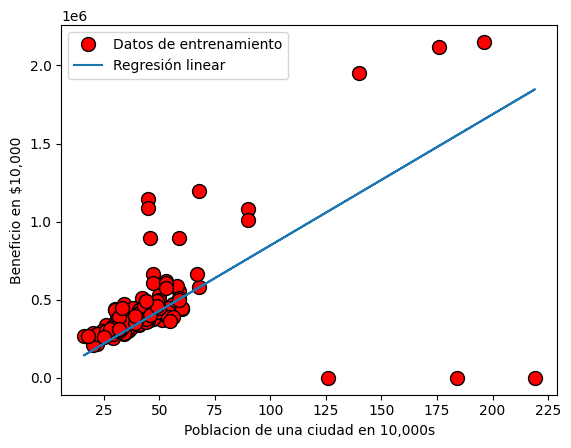

In [96]:
# grafica la linea de ajuste
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'Regresión linear']);
yr=np.dot(X, theta)
yr

Los valores finales de $\theta$ se utilizaran para realizar predicciones.

In [97]:
# Predecir valores de beneficio para poblaciones de 35,000 y 70,000
predict1 = np.dot([1, 40], theta)
print('Para una población = 35,000, se predice un beneficio de {:.2f}\n'.format(predict1))

predict2 = np.dot([1, 60], theta)
print('Para una población de = 70,000, se predice un beneficio de {:.2f}\n'.format(predict2))

Para una población = 35,000, se predice un beneficio de 345234.73

Para una población de = 70,000, se predice un beneficio de 512908.69



### 1.4 Visualizar $J(\theta)$

Para comprender mejor la función de costo $J(\theta)$, se graficará la funcion de costo en 2 dimenciones con los valores de $\theta_0$ y $\theta_1$. 

El proposito de graficar el costo para observar como $J(\theta)$ varia con cambios en $\theta_0$ y $\theta_1$. La función de costo  $J(\theta)$ tiene forma de una cuenca con un minimo global. (Esto es mas facil observar en los contornos de una superficie 3D). El minimo es el punto optimo para $\theta_0$ y $\theta_1$, en cada paso del descenso por el gradiente se mueve mas cerca a este punto.

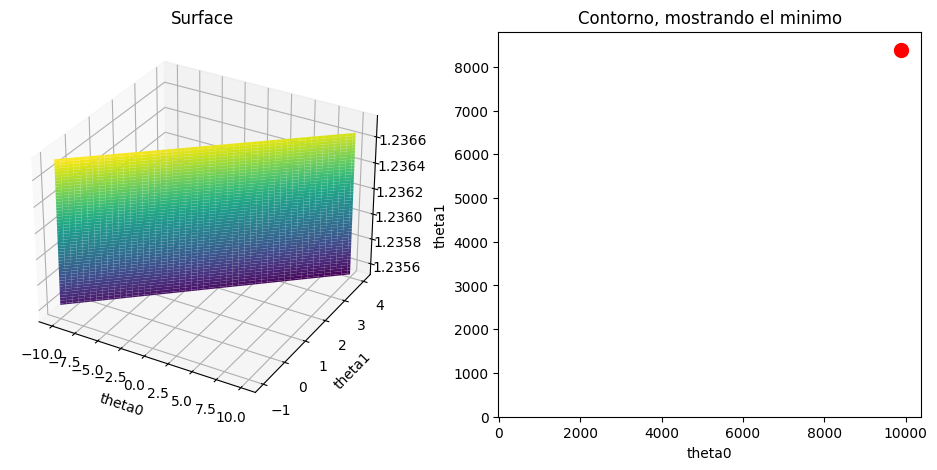

In [98]:
# cuadrícula sobre la que se calcula J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# inicializa J_vals con una matriz de 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Completar J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, [theta0, theta1])
        
# Debido a la forma en que funcionan las cuadrículas en el comando surf, 
# se necesita transponer J_vals antes de llamar a surf, o de lo contrario los ejes se invertirán
J_vals = J_vals.T

# graficar la superficie
fig = pyplot.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.title('Surface')

# graficar contornos
# Grafica J_vals como 15 contours spaciados logaritmicamente entre 0.01 y 100
ax = pyplot.subplot(122)
pyplot.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
pyplot.title('Contorno, mostrando el minimo')
pass